In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_airline = pd.read_csv("airline_passenger.csv")
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


* total 144 entry 

In [5]:
# if any null value :-
df_airline.dropna(axis=0, inplace= True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.shape

(144, 2)

In [8]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [9]:
df_airline.describe().T

,count,mean,std,min,25%,50%,75%,max
Thousands of Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [10]:
df_airline.columns

Index(['Month', 'Thousands of Passengers'], dtype='object')

In [11]:
df_airline.dtypes

Month                      object
Thousands of Passengers     int64
dtype: object

In [12]:
# Now convert the Month into datetime format
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [13]:
df_airline.set_index('Month', inplace = True)

In [14]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

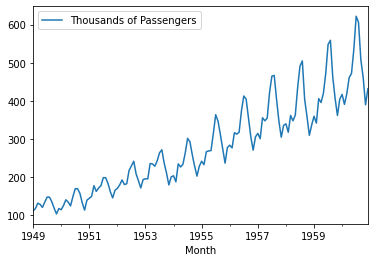

In [15]:
df_airline.plot()

According to Graph it look seasonal Data

In [16]:
# ADF(Augmented Dickey- Fuller) 
from statsmodels.tsa.stattools import adfuller

## IMP

In [17]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [18]:
adf_test(df_airline['Thousands of Passengers'])\

ADF Statistics: 0.8153688792060539
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing Technique

In [19]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)


In [20]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [21]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169995
p- value: 0.05421329028382612
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### Now Difference again by shifting the one element in the row and do Difference until we get [p<=0.05]

In [22]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)


In [23]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468463
p- value: 2.732891850014476e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


##### again it fail so shifting process do until we get p<=0.05

In [24]:
df_airline.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0
1960-11-01,390,-71.0,-24.0
1960-12-01,432,42.0,113.0


### Note:-
##### " Seasonal Data" :-  use 12 month or diference = 12
* Arima --> Sometime it not work well
* Sarimax --> work well in the seasonal data 


In [25]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)


In [26]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924796
p- value: 0.011551493085515008
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

##### Observe the 2nd Difference data

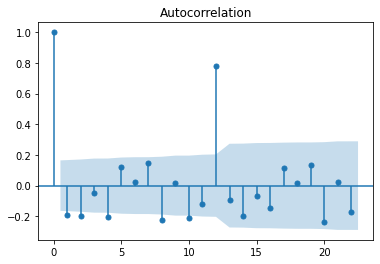

In [28]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

In [29]:
# in case limit was extended as it move toward right it' mean --> Error part also increase

### For 12th d we observe the data

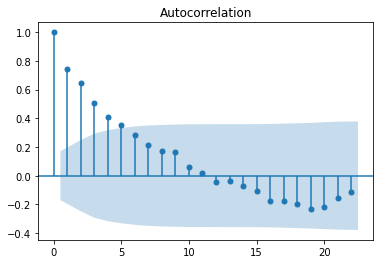

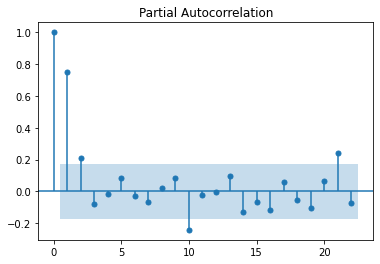

In [30]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())


#### Note: - P and Q
* P --> ["Partial Autocorrelation"]
* Q --> ["Autocorrelation"]        
* but as shown in figure Autocorrelation contain q- 6 value but 1st is for zero / shade area but also show the reason area' same for "P"

/home/arcgate/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


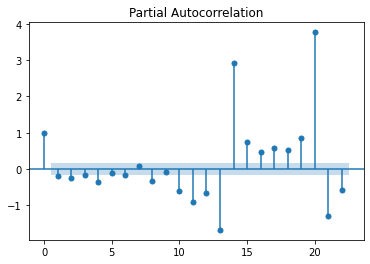

In [31]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

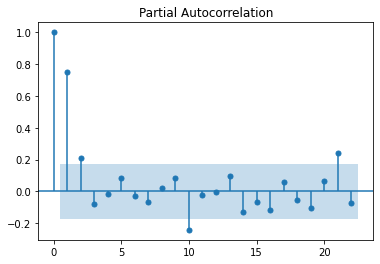

In [32]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

##### Note:-
* Create value upto 2 then count 10 it show also then check also for 10

## Note:-
### Pacf --> AR and Acf --> MA
* P --> no. of time line get "Upper" as well as "Lower" bond from "pacf" graph
* d --> no. of time difference taken 
* q --> no. of time line get "Upper" as well as "Lower" bond from "acf" graph

In [33]:
# compare and we see the difference b/w both ["pacf12" vs "pacf2"] 

### Split train and test Data

In [34]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [35]:
df_airline.tail(2)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1960-11-01,390,-71.0,-24.0,28.0
1960-12-01,432,42.0,113.0,27.0


In [36]:

from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)


In [37]:


train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]


In [38]:


##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]


In [39]:


test_data


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


### ARIMA

In [45]:

## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA



In [46]:
train_data


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347,-17.0,-66.0,54.0
1955-09-01,312,-35.0,-18.0,53.0
1955-10-01,274,-38.0,-3.0,45.0


In [ ]:
acf2 = plot_acf(df_airline["Passengers Second Difference"].dropna())
pacf2 = plot_pacf(df_airline["Passengers Second Difference"].dropna())


Second Difference ((PACF)start from 10 ,difference intially 2 time, (ACF)12 data is bassicaly high impact)


In [52]:
# Second Difference (start from 10 ,difference intially 2 time, 12 data is bassicaly high impact)

model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,0))

# if q=12 so i have move to seasonal arima

/home/arcgate/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/arcgate/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [53]:
model_Arima_fit=model_ARIMA.fit()

In [54]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                        ARIMA(10, 2, 0)   Log Likelihood                -357.239
Method:                               css-mle   S.D. of innovations             18.333
Date:                        Thu, 08 Dec 2022   AIC                            738.477
Time:                                18:14:19   BIC                            767.358
Sample:                            03-01-1949   HQIC                           750.072
                                 - 12-01-1955                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.0163      0.347      0.047      0.962      -0.665       0.697
ar.L1.D2.Thousands of Passengers     -0.5165      0.097     -5.300      0.000      -0.707      -0.325
ar.L2.D2.Thousands of Passengers     -0.7203      0.108     -6.650      0.000      -0.933      -0.508
ar.L3.D2.Thousands of Passengers     -0.4856      0.120     -4.032      0.000      -0.722      -0.250
ar.L4.D2.Thousands of Passengers     -0.7506      0.131     -5.717      0.000      -1.008      -0.493
ar.L5.D2.Thousands of Passengers     -0.5065      0.151     -3.360      0.001      -0.802      -0.211
ar.L6.D2.Thousands of Passengers     -0.5204      0.149     -3.500      0.000      -0.812      -0.229
ar.L7.D2.Thousands of Passengers     -0.3055      0.136     -2.250      0.024      -0.572      -0.039
ar.L8.D2.Thousands of Passengers     -0.5943      0.125     -4.744      0.000      -0.840      -0.349
ar.L9.D2.Thousands of Passengers     -0.2966      0.116     -2.556      0.011      -0.524      -0.069
ar.L10.D2.Thousands of Passengers    -0.4826      0.101     -4.765      0.000      -0.681      -0.284
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.9098           -0.5670j            1.0720           -0.0887
AR.2             0.9098           +0.5670j            1.0720            0.0887
AR.3             0.4844           -0.9210j            1.0406           -0.1729
AR.4             0.4844           +0.9210j            1.0406            0.1729
AR.5            -0.9676           -0.4146j            1.0527           -0.4356
AR.6            -0.9676           +0.4146j            1.0527            0.4356
AR.7            -0.6004           -0.8889j            1.0726           -0.3445
AR.8            -0.6004           +0.8889j            1.0726            0.3445
AR.9            -0.1335           -1.1349j            1.1427           -0.2686
AR.10           -0.1335           +1.1349j            1.1427            0.2686
------------------------------------------------------------------------------
"""

P>|z|	---> all the 10 lags that are actually taken all the p value is less than 0.05 that it has +ve impa

In [55]:

##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)


1956-01-01 00:00:00
1960-12-01 00:00:00


In [56]:



pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred


In [57]:
residuals

Month
1956-01-01    302.695982
1956-02-01    289.830787
1956-03-01    319.329709
1956-04-01    328.562187
1956-05-01    298.689268
1956-06-01    354.352072
1956-07-01    426.271442
1956-08-01    441.529648
1956-09-01    350.001354
1956-10-01    315.913236
1956-11-01    242.711464
1956-12-01    281.647788
1957-01-01    333.119986
1957-02-01    304.741475
1957-03-01    367.652437
1957-04-01    343.198128
1957-05-01    343.325710
1957-06-01    413.019323
1957-07-01    483.932100
1957-08-01    477.557343
1957-09-01    403.265294
1957-10-01    346.226371
1957-11-01    281.802303
1957-12-01    337.112086
1958-01-01    347.244803
1958-02-01    325.413895
1958-03-01    364.318109
1958-04-01    341.830075
1958-05-01    355.290640
1958-06-01    435.056461
1958-07-01    504.184622
1958-08-01    505.771360
1958-09-01    405.976064
1958-10-01    350.193196
1958-11-01    301.548533
1958-12-01    341.117863
1959-01-01    364.677813
1959-02-01    347.031506
1959-03-01    403.339720
1959-04-01    392.1

In [64]:
pred

1956-01-01   -18.695982
1956-02-01   -12.830787
1956-03-01    -2.329709
1956-04-01   -15.562187
1956-05-01    19.310732
1956-06-01    19.647928
1956-07-01   -13.271442
1956-08-01   -36.529648
1956-09-01     4.998646
1956-10-01    -9.913236
1956-11-01    28.288536
1956-12-01    24.352212
1957-01-01   -18.119986
1957-02-01    -3.741475
1957-03-01   -11.652437
1957-04-01     4.801872
1957-05-01    11.674290
1957-06-01     8.980677
1957-07-01   -18.932100
1957-08-01   -10.557343
1957-09-01     0.734706
1957-10-01     0.773629
1957-11-01    23.197697
1957-12-01    -1.112086
1958-01-01    -7.244803
1958-02-01    -7.413895
1958-03-01    -2.318109
1958-04-01     6.169925
1958-05-01     7.709360
1958-06-01    -0.056461
1958-07-01   -13.184622
1958-08-01    -0.771360
1958-09-01    -1.976064
1958-10-01     8.806804
1958-11-01     8.451467
1958-12-01    -4.117863
1959-01-01    -4.677813
1959-02-01    -5.031506
1959-03-01     2.660280
1959-04-01     3.850267
1959-05-01     4.913951
1959-06-01    -5

The prediction value very small 

<AxesSubplot:ylabel='Density'>

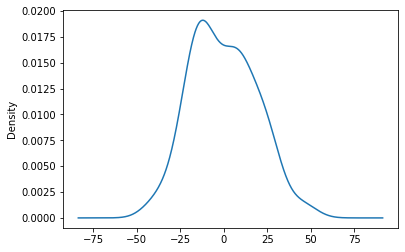

In [59]:
model_Arima_fit.resid.plot(kind='kde')

this graph is look good -- normal distributed graph

In [60]:
# now put all pred value inside another columns

In [61]:
test_data['Predicted_Arima'] = pred

/home/arcgate/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Month'>

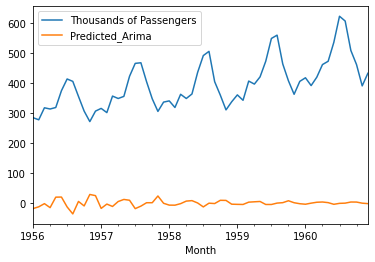

In [62]:
test_data[['Thousands of Passengers', 'Predicted_Arima']].plot()

#### this is huge difference---> something some mistake happen

In [65]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_Arima
Month,,,,,
1956-01-01,284,6.0,-35.0,42.0,-18.695982
1956-02-01,277,-7.0,-13.0,44.0,-12.830787
1956-03-01,317,40.0,47.0,50.0,-2.329709
1956-04-01,313,-4.0,-44.0,44.0,-15.562187
1956-05-01,318,5.0,9.0,48.0,19.310732
1956-06-01,374,56.0,51.0,59.0,19.647928
1956-07-01,413,39.0,-17.0,49.0,-13.271442
1956-08-01,405,-8.0,-47.0,58.0,-36.529648
1956-09-01,355,-50.0,-42.0,43.0,4.998646
